In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ("WineData.csv",index_col=False)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5847 non-null   object 
 1   fixed acidity         5847 non-null   float64
 2   volatile acidity      5847 non-null   float64
 3   citric acid           5847 non-null   float64
 4   residual sugar        5847 non-null   float64
 5   chlorides             5847 non-null   float64
 6   free sulfur dioxide   5847 non-null   float64
 7   total sulfur dioxide  5847 non-null   float64
 8   density               5847 non-null   float64
 9   pH                    5847 non-null   float64
 10  sulphates             5847 non-null   float64
 11  alcohol               5847 non-null   float64
 12  quality               5847 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 594.0+ KB


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.2,0.20,0.25,15.0,0.055,8.0,120.0,0.99767,3.19,0.53,9.6,6
1,white,6.4,0.26,0.43,12.6,0.033,64.0,230.0,0.99740,3.08,0.38,8.9,5
2,white,6.7,0.11,0.26,14.8,0.053,44.0,95.0,0.99676,3.20,0.35,9.8,6


In [3]:
print('Discrete data:   ')
print('type ' + str(sorted(df['type'].unique())))
print('quality level ' + str(sorted(df['quality'].unique())))


Discrete data:   
type ['red', 'white']
quality level [3, 4, 5, 6, 7, 8, 9]


In [4]:
#fill1 = (df.type == 'red')
#df.loc[fill1, 'type'] = 0
#fill2 = (df.type == 'white')
#df.loc[fill2, 'type'] = 1
#print('type ' + str(sorted(df['type'].unique())))

Above cell is us changing red wine to have a value of 0 and white wine to have the value of 1

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5847.0,7.210723,1.294523,3.80000,6.400000,7.0000,7.70000,15.60000
volatile acidity,5847.0,0.339202,0.164462,0.08000,0.230000,0.2900,0.40000,1.58000
citric acid,5847.0,0.318040,0.143990,0.00000,0.250000,0.3100,0.39000,1.23000
residual sugar,5847.0,5.423046,4.758172,0.60000,1.800000,3.0000,8.10000,65.80000
chlorides,5847.0,0.056098,0.034863,0.00900,0.038000,0.0470,0.06500,0.61100
free sulfur dioxide,5847.0,30.496408,17.705351,1.00000,17.000000,29.0000,41.00000,289.00000
total sulfur dioxide,5847.0,115.909697,56.791255,6.00000,77.000000,118.0000,156.00000,440.00000
density,5847.0,0.994698,0.003003,0.98711,0.992375,0.9949,0.99693,1.03898
pH,5847.0,3.218811,0.160036,2.72000,3.110000,3.2100,3.32000,4.01000
sulphates,5847.0,0.531250,0.149039,0.22000,0.430000,0.5100,0.60000,2.00000


Data set is clean, no null values or negative readings

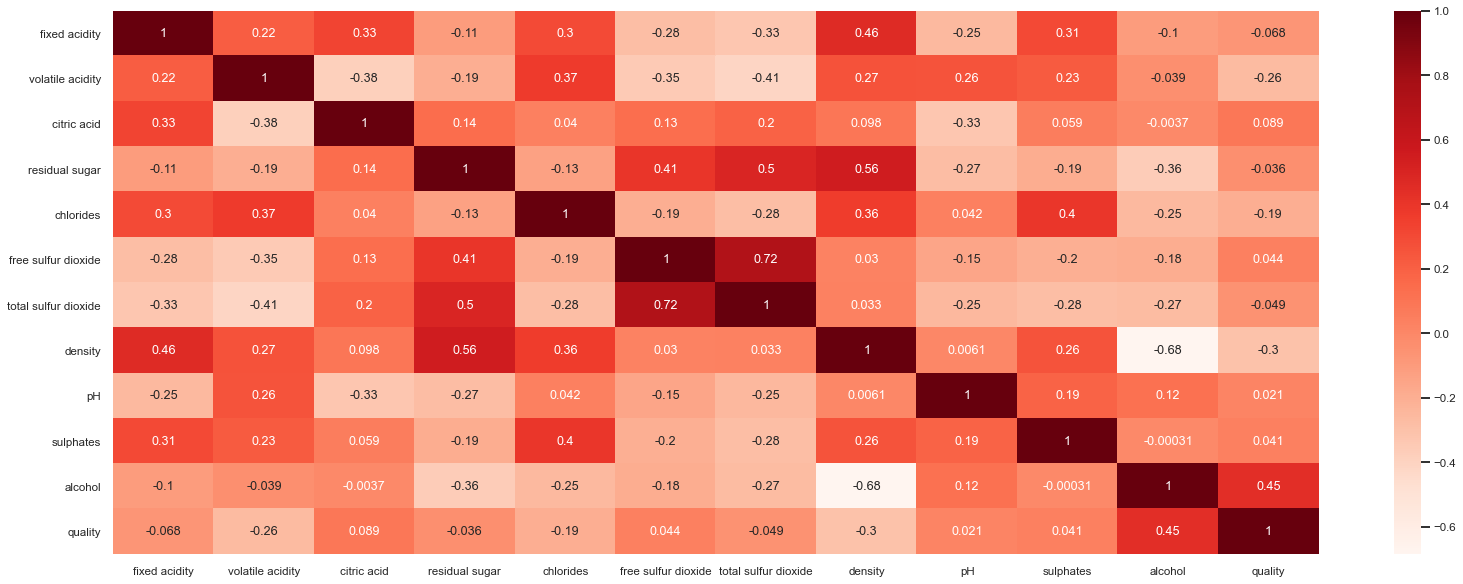

In [7]:
sns.set(rc={'figure.figsize':(27,10)})
sns.set_context("talk", font_scale=0.7)
    
sns.heatmap(df.iloc[:,:].corr(), cmap='Reds', annot=True)

Comparing the quality with the other parameters, we can see there is a high correlation between it and Alcohol > citric acid content > free sulfur dioxide > sulphates and then pH 

To start with, we are going to compare the quality with the type of wine

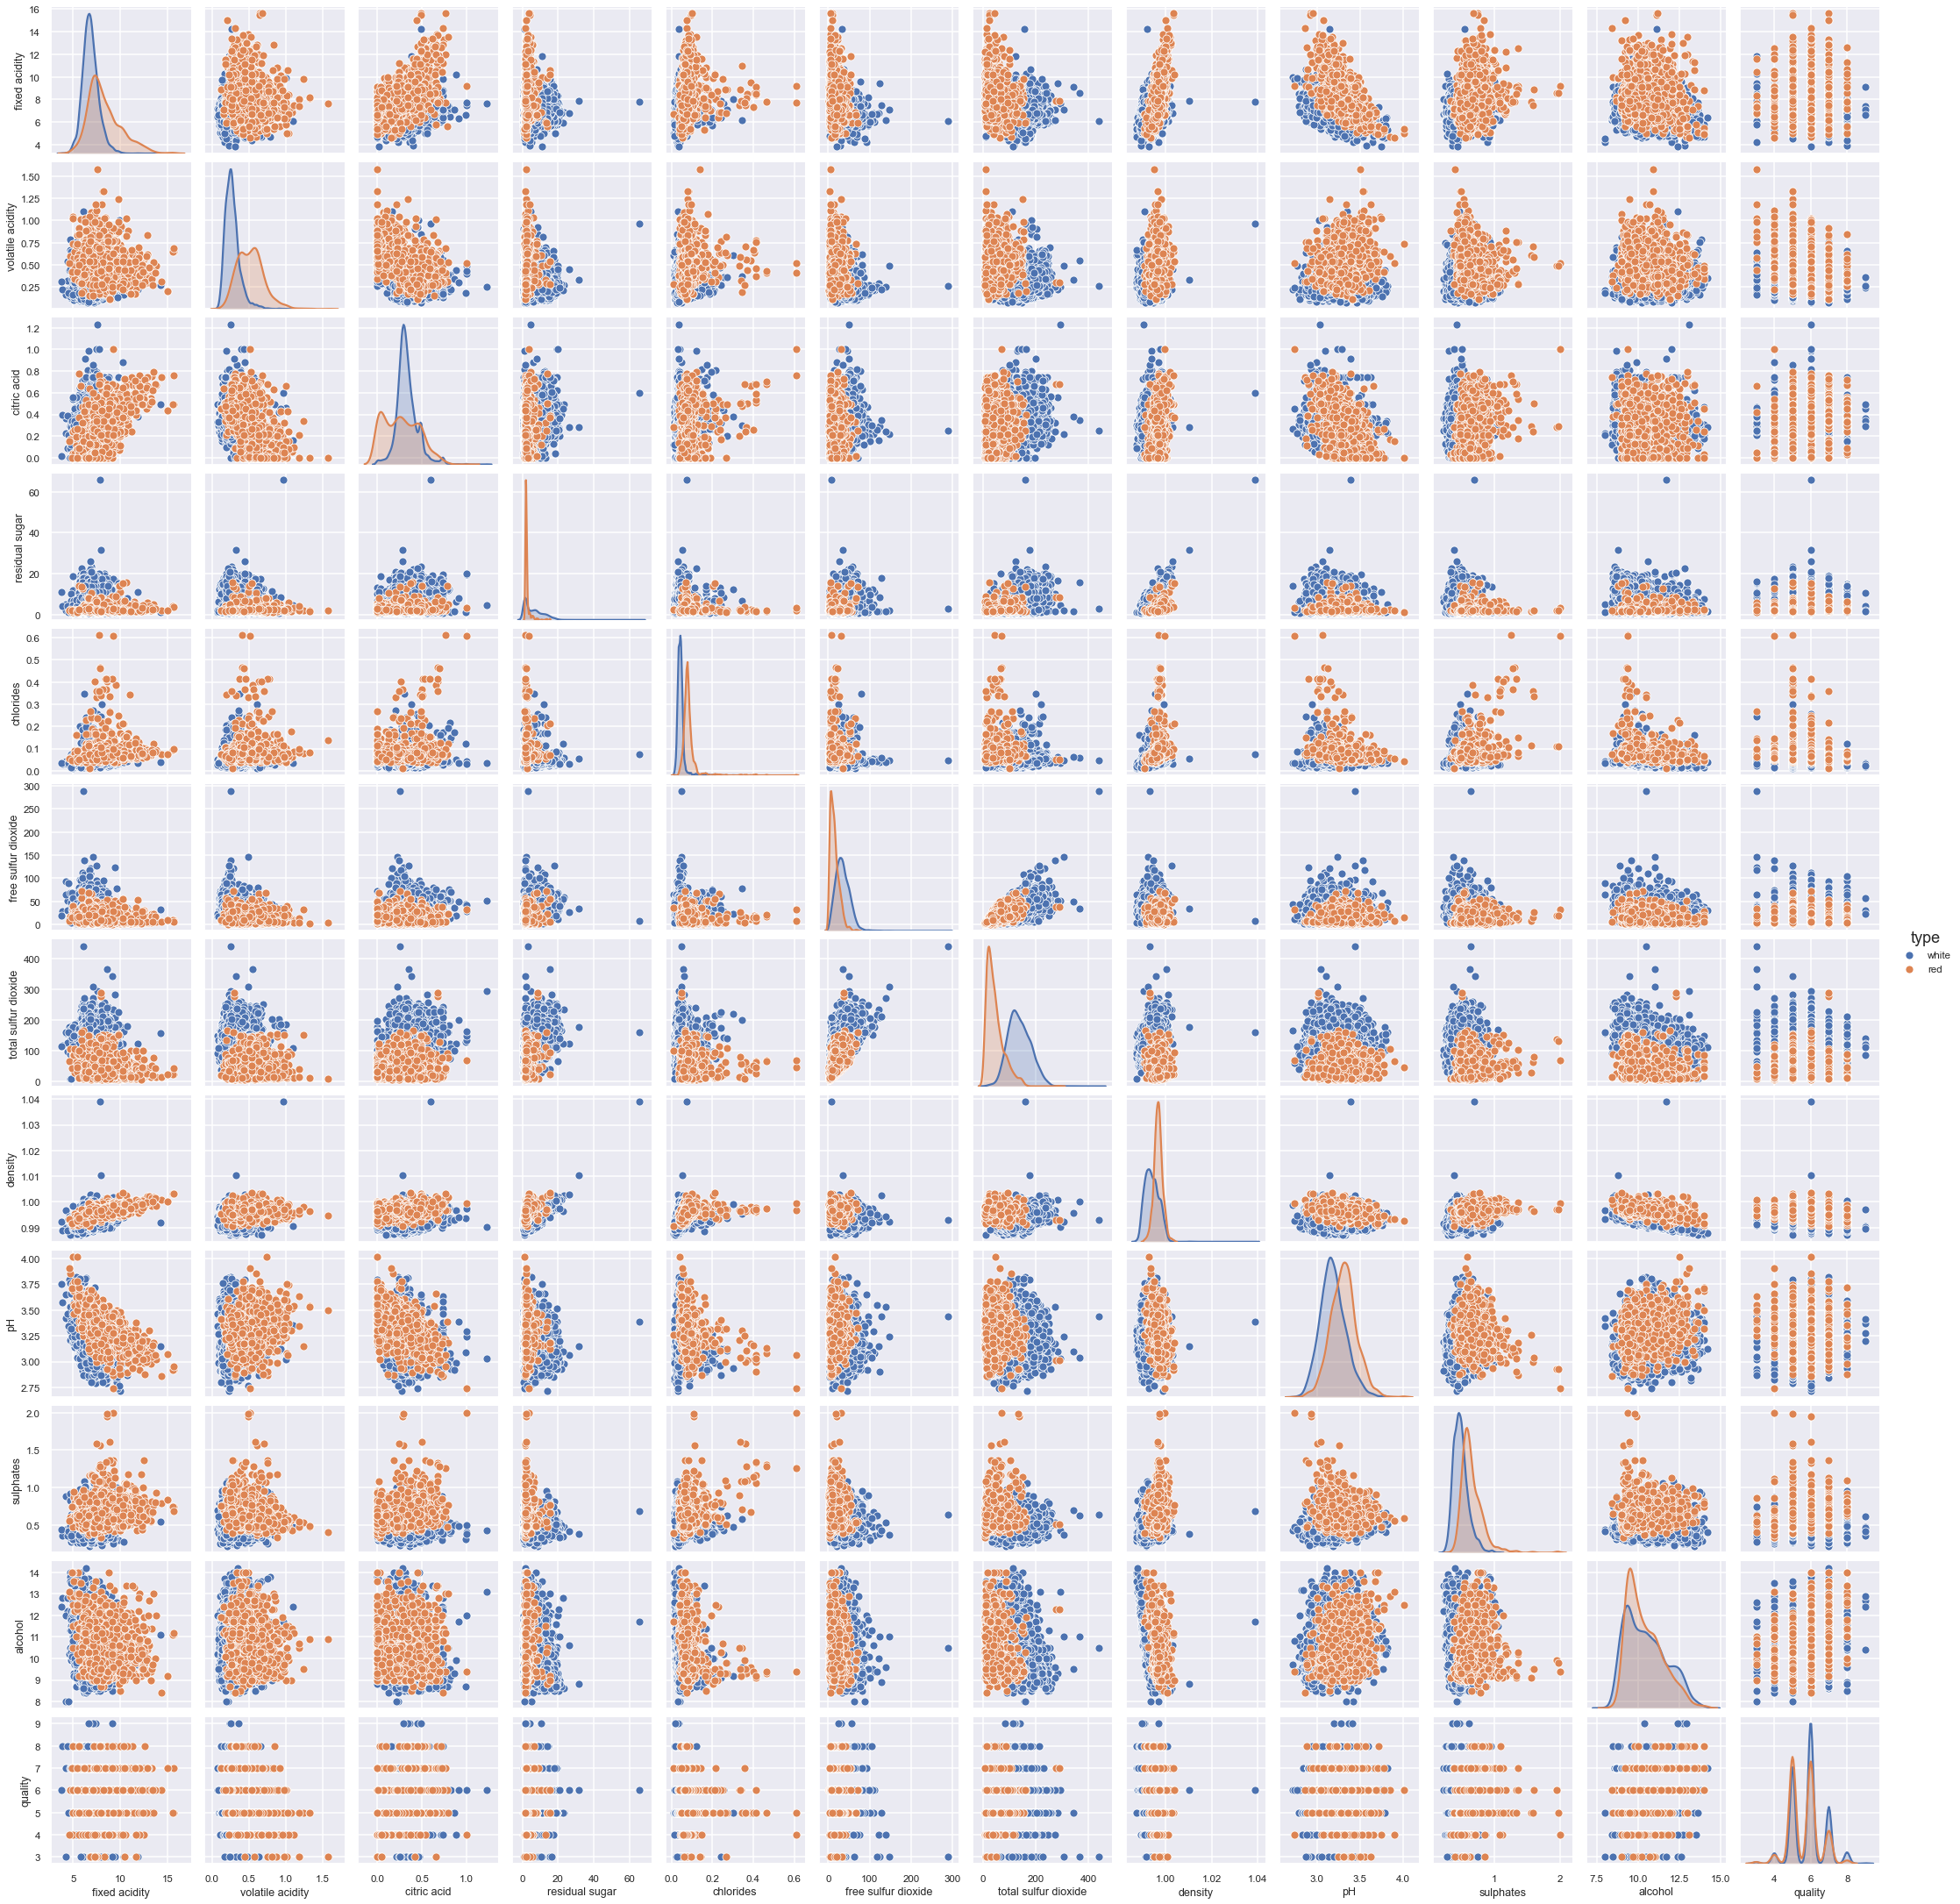

In [8]:
pairplot = sns.pairplot(data=df, hue="type")

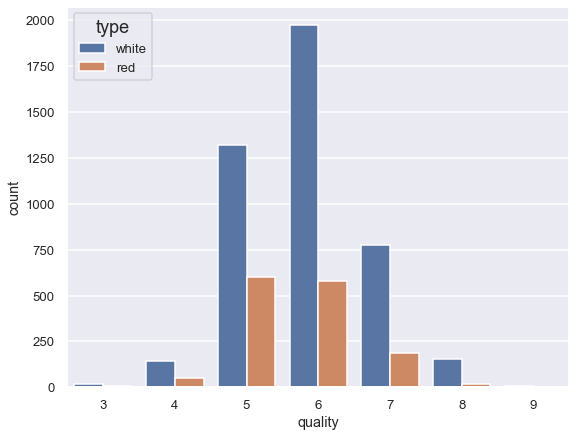

In [9]:
sns.set(rc={'figure.figsize': (9,7)})
sns.set_context("talk", font_scale=0.8)

type = sns.countplot(x="quality",hue="type", data=df)
plt.show()

In [10]:
red0 = df.groupby(df['quality'][df['type'] == 'red']).size().reset_index(name='Red Wine')
white1 = df.groupby(df['quality'][df['type'] == 'white']).size().reset_index(name='White Wine')
total = df.groupby('quality').size().reset_index(name='Total')

wineTypeTable = red0.join(white1['White Wine']).join(total['Total'])

wineTypeTable['quality'] = ['Quality Level 3', 'Quality Level 4', 'Quality Level 5', 'Quality Level 6', 'Quality Level 7', 'Quality Level 8']

wineTypeTable

,quality,Red Wine,White Wine,Total
0,Quality Level 3,9,20,29
1,Quality Level 4,50,144,194
2,Quality Level 5,604,1322,1926
3,Quality Level 6,578,1976,2554
4,Quality Level 7,187,777,964
5,Quality Level 8,18,157,175


In [11]:
wineTypeTable['Red Wine'] = round((red0['Red Wine']/total['Total'])*100,2)
wineTypeTable['White Wine'] = round((white1['White Wine']/total['Total'])*100/2)

winetypePercent = wineTypeTable.iloc[:,0:3]
winetypePercent = winetypePercent.rename(columns={'Red Wine': 'Red Wine (%)', 'White Wine': 'White Wine (%)' })

winetypePercent

,quality,Red Wine (%),White Wine (%)
0,Quality Level 3,31.03,34.0
1,Quality Level 4,25.77,37.0
2,Quality Level 5,31.36,34.0
3,Quality Level 6,22.63,39.0
4,Quality Level 7,19.40,40.0
5,Quality Level 8,10.29,45.0


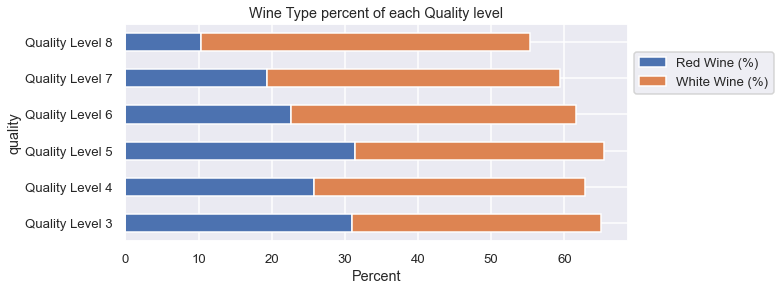

In [12]:
sns.set(rc={'figure.figsize':(9,4)})
sns.set_context("talk", font_scale=0.8)

ax = winetypePercent.plot(x='quality', kind='barh', stacked=True, title='Wine Type percent of each Quality level')
ax.set_xlabel('Percent')
ax.get_legend().set_bbox_to_anchor((1,0.9))

plt.show()

Lets start comparing quality and alcohol level!!

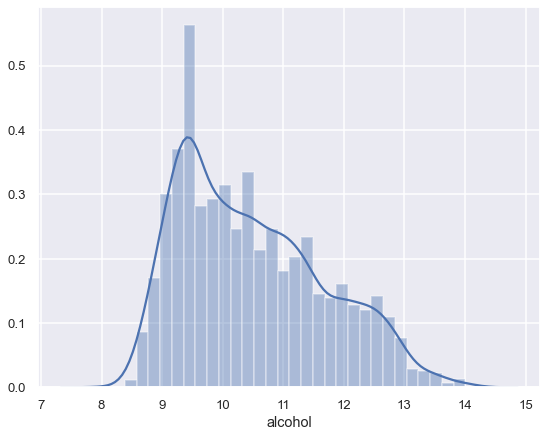

Alcohol Level standard deviation is 1.1925042587193402
Alcohol Level mean is 10.485661592836545


In [49]:
sns.set(rc={'figure.figsize': (9,7)})
sns.set_context("talk", font_scale=0.8)
sns.distplot(alco)
plt.show()
alcoholstd = df['alcohol'].std()
alcoholmean = df['alcohol'].mean()
print('Alcohol Level standard deviation is ' + str(alcoholstd))
print('Alcohol Level mean is ' + str(alcoholmean))

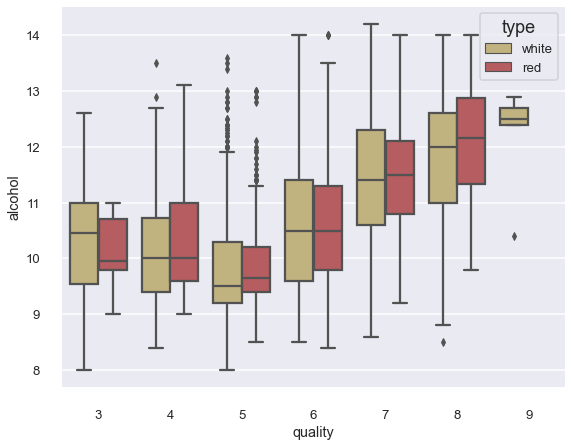

In [14]:
sns.set(rc={'figure.figsize': (9,7)})
sns.set_context("talk", font_scale=0.8)

alcoholQuality = sns.boxplot(x='quality', y='alcohol',
                hue="type", palette=["y", "r"], data=df)
sns.despine(offset=10, trim=True)
alcoholQuality

from the chart above, other than the outlier identification.. we can derrive conclusions regarding how the alcohol level plays a part in the quality level for both white and red wine

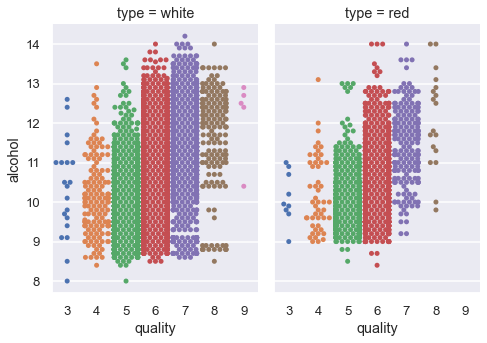

In [32]:
sns.set(rc={'figure.figsize': (9,7)})
sns.set_context("talk", font_scale=0.8)
alcoholcat = sns.catplot(x="quality", y="alcohol",col='type', aspect=0.7 ,kind="swarm", data=df)
alcoholcat


After studying the alcohol level and type against the quality, citric acid is to be studied now

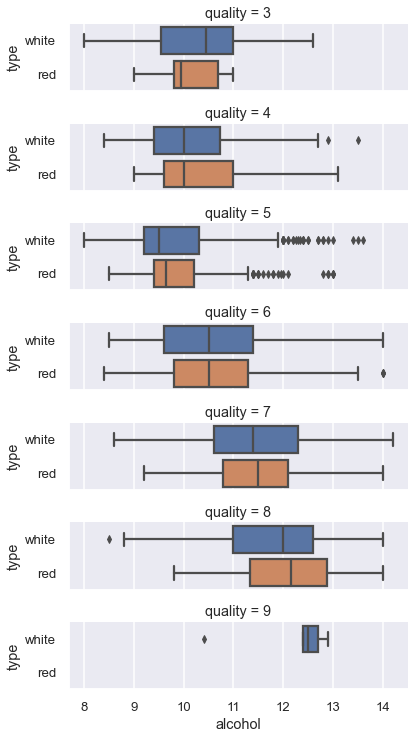

In [36]:
alcoholcatdense = sns.catplot(x="alcohol", y="type", row="quality",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df)

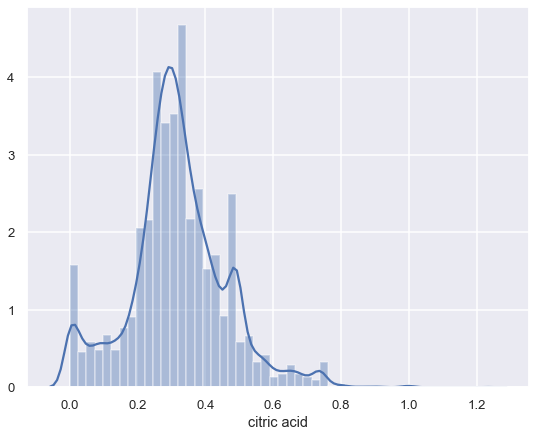

Citric Acid Level standard deviation is 0.14399030800146703
Citric Acid Level mean is 0.3180400205233402


In [54]:
sns.set(rc={'figure.figsize': (9,7)})
sns.set_context("talk", font_scale=0.8)

CAcid = sns.distplot(df['citric acid'],kde=True)
plt.show()
CAcidSTD = df['citric acid'].std()
CAcidMEAN = df['citric acid'].mean()
print('Citric Acid Level standard deviation is ' + str(CAcidSTD))
print('Citric Acid Level mean is ' + str(CAcidMEAN))

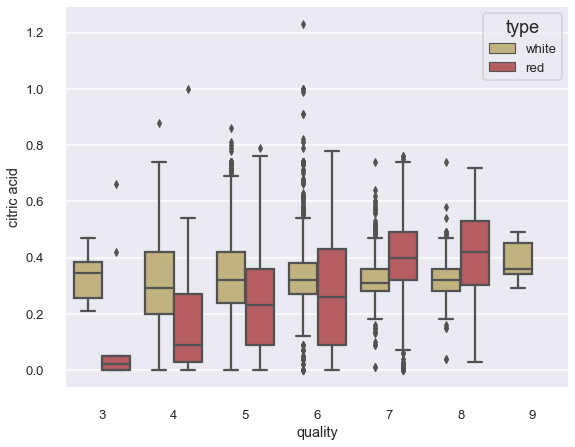

In [64]:
sns.set(rc={'figure.figsize': (9,7)})
sns.set_context("talk", font_scale=0.8)

citricAcidBPlot = sns.boxplot(x='quality', y='citric acid',
                hue="type", palette=["y", "r"], data=df)
sns.despine(offset=10, trim=True)
citricAcidBPlot

The box plots above shows that a strong positive correlation  is present between the quality level and citric acid content in RED wine, but a more conservative and constant level for white wine..

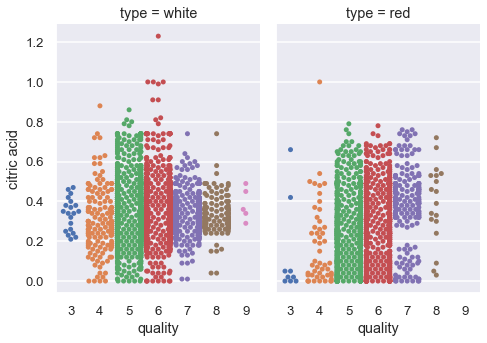

In [65]:
sns.set(rc={'figure.figsize': (9,7)})
sns.set_context("talk", font_scale=0.8)
citAcidCat = sns.catplot(x="quality", y="citric acid",col='type', aspect=0.7 ,kind="swarm", data=df)
citAcidCat

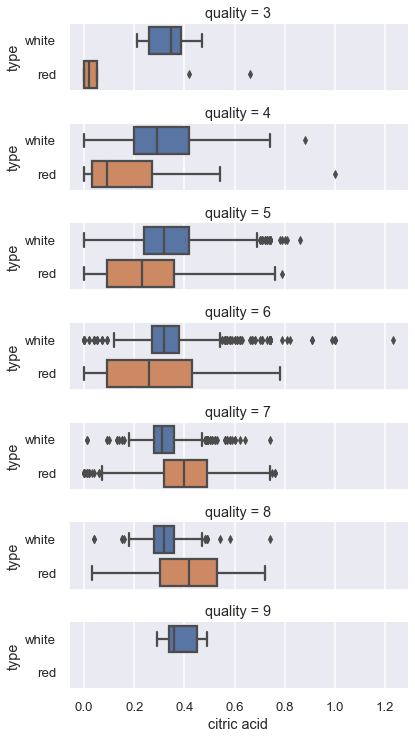

In [66]:
citAcidcatdense = sns.catplot(x="citric acid", y="type", row="quality",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df)